# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from scipy.io import loadmat
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.24.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
#X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


mnist = loadmat('./mnist-original.mat', squeeze_me=True )
X = mnist['data'].T
Y = mnist['label'].T

print(X.shape)
print(Y.shape)





# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



(70000, 784)
(70000,)
data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

<Figure size 7840x7840 with 0 Axes>

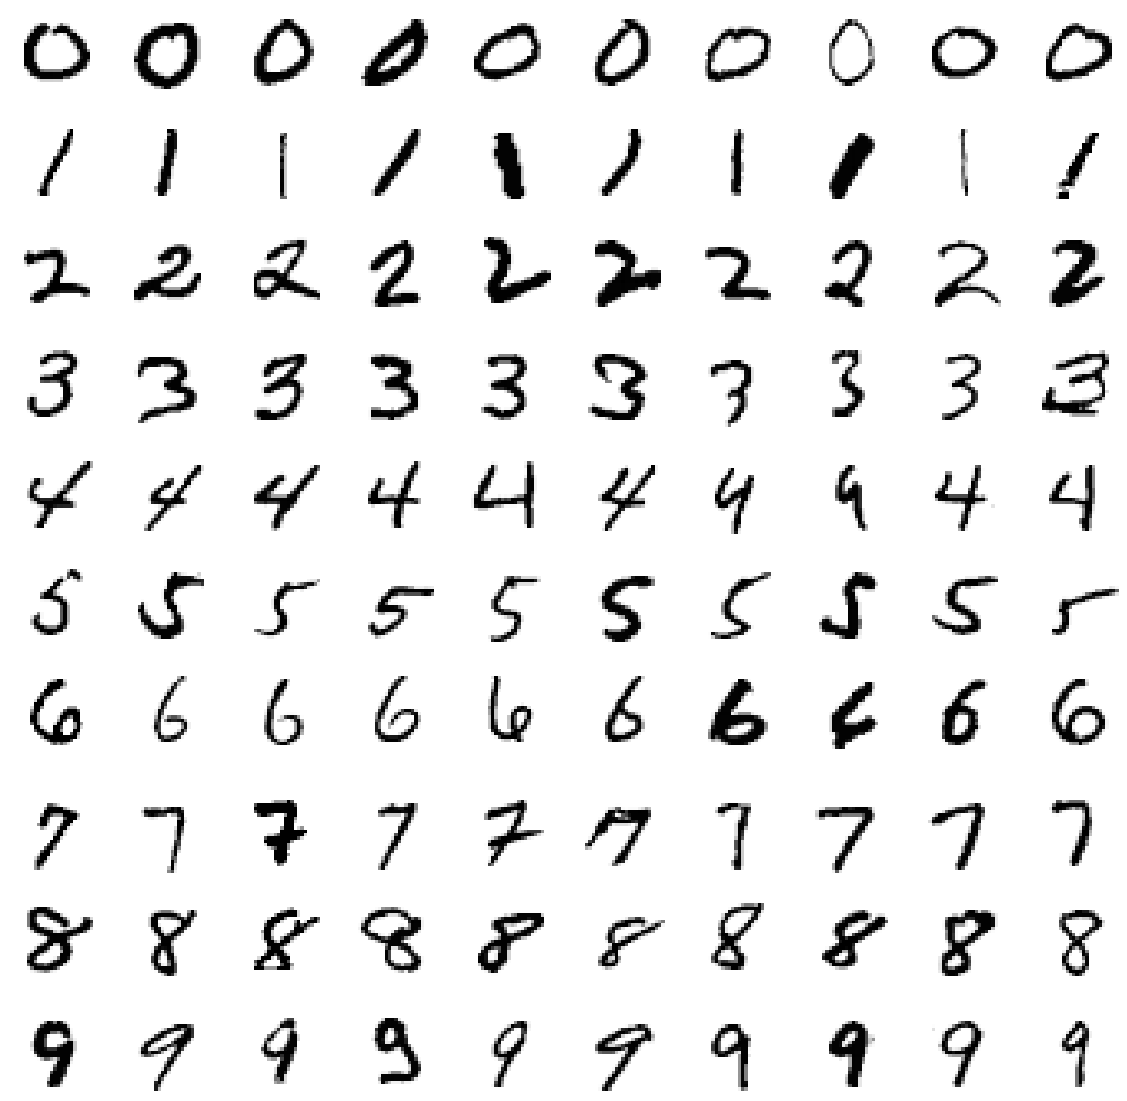

In [5]:
def P1(num_examples=10):

### STUDENT START ###

    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])
      
    digits = np.unique(Y)
    num = 10
    dim = int(np.sqrt(X.shape[1]))

    fig, axs = plt.subplots(len(digits), num, figsize=(20,20))

    for i,d in enumerate(digits):
        for j in range(num):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)))
            axs[i,j].axis('off')            

            
### STUDENT END ###

P1(10)


### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [19]:
#def P2(k_values):

### STUDENT START ###

def P2(kval):
    for k in kval:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        dev_pred = model.predict(dev_data)
        score = model.score(dev_data, dev_labels) 
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))

        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print ('\n Precission, recall, F1 for each digit:')
            print (classification_report(dev_labels, dev_pred, target_names = labels))   
        
        
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]

P2(k_values)

k=1, accuracy=88.80%

 Precission, recall, F1 for each digit:
              precision    recall  f1-score   support

        b'0'       0.91      0.98      0.94        99
        b'1'       0.89      1.00      0.94       105
        b'2'       0.99      0.79      0.88       102
        b'3'       0.77      0.87      0.82        86
        b'4'       0.89      0.82      0.85       104
        b'5'       0.93      0.84      0.88        91
        b'6'       0.94      0.96      0.95        98
        b'7'       0.89      0.92      0.90       113
        b'8'       0.94      0.88      0.91        96
        b'9'       0.78      0.82      0.80       106

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

k=3, accuracy=87.80%
k=5, accuracy=86.90%
k=7, accuracy=86.50%
k=9, accuracy=86.30%


ANSWER:

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [22]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    elapsed_times = []

    model = KNeighborsClassifier(n_neighbors=1)
    for size in train_sizes:
        start = time.time()
        train_data, train_labels = X[:size], Y[:size]
        model.fit(train_data, train_labels)
        accuracies.append(model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_times.append(end - start)
    print(''.join('Training size = {0:5d} => Accuracy = {1:.3f} => Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_times)))

### STUDENT END ###

train_sizes = [5000, 10000, 15000, 20000, 30000, 40000, 60000, 100000, 1000000]
accuracies = []
P3(train_sizes, accuracies)


Training size =  5000 => Accuracy = 0.929 => Elapsed time = 0.15
Training size = 10000 => Accuracy = 0.955 => Elapsed time = 0.21
Training size = 15000 => Accuracy = 0.961 => Elapsed time = 0.30
Training size = 20000 => Accuracy = 0.964 => Elapsed time = 0.38
Training size = 30000 => Accuracy = 0.975 => Elapsed time = 0.57
Training size = 40000 => Accuracy = 0.976 => Elapsed time = 0.78
Training size = 60000 => Accuracy = 0.977 => Elapsed time = 1.11
Training size = 100000 => Accuracy = 1.000 => Elapsed time = 1.30
Training size = 1000000 => Accuracy = 1.000 => Elapsed time = 1.30



### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R-squared of original: 0.32
R-squared of log transform: 0.80
R-squared of sqrt transform: 0.48
R-squared of log-log transform: 0.86


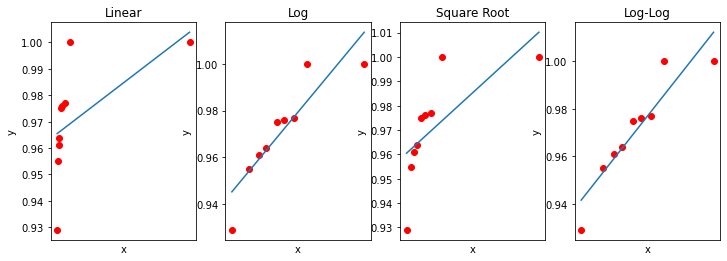

In [25]:
#train_sizes = [5000, 10000, 15000, 20000, 30000, 40000, 60000, 100000, 1000000]
#accuracies = [0.929, 0.942, 0.954, 0.956, 0.967, 0.971, 0.974, 1.0, 1.0]
#data = [ X[:60000], X[:120000] , X[:1000000] ]     
#labels =  [ Y[:60000], Y[:120000] , Y[:1000000] ] 


def P4():

### STUDENT START ###  

    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    model = LinearRegression()
    model.fit(X, y)       
#    print('mean_squared_error: %.2f' % mean_squared_error(y, model.predict(X)))
    print('R-squared of original: %.2f' % r2_score(y, model.predict(X)))

    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 4, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 1000000, 1000)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(X, y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Linear')
 
    logX = np.log10(X)
    model.fit(logX, y)
#    print('mean_squared_error of log transform: %.2f' % mean_squared_error(y, model.predict(logX)))
    print('R-squared of log transform: %.2f' % r2_score(y, model.predict(logX)))
    ax = plt.subplot(1, 4, 2)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(X.min()), np.log10(1000000), 1000)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.log10(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log')
 
    sqrtX = np.sqrt(X)
    model.fit(sqrtX, y)
#    print('mean_squared_error of sqrt transform: %.2f' % mean_squared_error(y, model.predict(sqrtX)))
    print('R-squared of sqrt transform: %.2f' % r2_score(y, model.predict(sqrtX))) 
    ax = plt.subplot(1, 4, 3)
    plt.setp(ax, xticks=())
    x = np.linspace(np.sqrt(X.min()), np.sqrt(1000000), 1000)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.sqrt(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Square Root')
 
    log_logX = np.log10(np.log10(X))
    model.fit(log_logX, y)
#    print('mean_squared_error of log-log transform: %.2f' % mean_squared_error(y, model.predict(log_logX)))
    print('R-squared of log-log transform: %.2f' % r2_score(y, model.predict(log_logX)))
    ax = plt.subplot(1, 4, 4)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(1000000)), 1000)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.scatter(np.log10(np.log10(X)), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log-Log')

### STUDENT END ###
 
P4()

ANSWER:  The value predicted by the linear model for n=60000 is greater than 1, the maximum value for the accuracy, which doesn't make sense: a linear model does not fit well (besides, we're predicting out of the range of our examples (the *confidence ellipsoid* in multivariate regression). If we use the square root of the feature x, the model is slightly better, the logarithm of x is even better, and the log-log transformation is almost a perfect fit (though the predicted value for n=60000 is still above 1).

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

(1000,)
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

the model confuse most often:
There are 14 cases in which the digit 4 is confused with the digit 9.
the digits are as the follows:



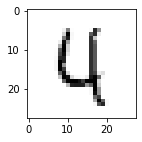

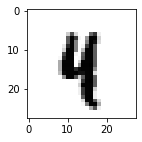

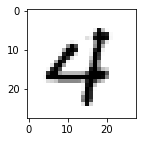

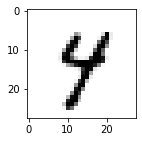

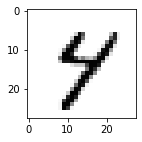

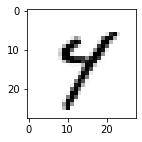

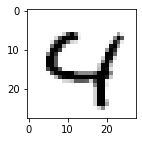

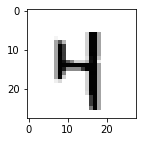

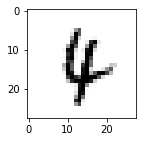

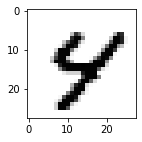

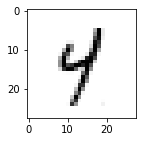

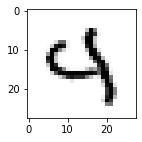

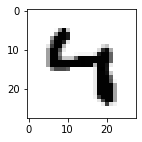

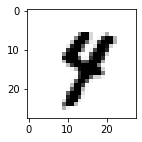

In [27]:
def P5():

### STUDENT START ###

# Create a 1NN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    Y = model.predict(dev_data)
    
    print(Y.shape)
    confusion = confusion_matrix(dev_labels, Y)

    print(confusion)
    np.fill_diagonal(confusion, 0)

    row, col = np.unravel_index(confusion.argmax(), confusion.shape)
    max = confusion.max()
    
    print('\n===========================================================')
    print('the model confuse most often:')
    print('There are {0:2d} cases in which the digit {1:d} is confused with the digit {2:d}.'.format(max,row, col))
    print('the digits are as the follows:')
    print('============================================================\n')
     

    confused_digit = []*max

    j = 0
    
    for i in range(1000): 

        if (dev_labels[i] == row) & (Y[i] == col ):
            confused_digit.append(dev_data[i])
            j = j+1
               
    dim = int(np.sqrt(X.shape[1]))
    plt.rc('image', cmap='Greys')

    for k in confused_digit:
        fig, axs = plt.subplots(1, 1, figsize=(2,2))
        axs.imshow(k.reshape((dim,dim)))

 
            
### STUDENT END ###

P5()